In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [86]:
#importing my dataset
df = pd.read_csv(r'C:\Users\manda\The-Big-Bang-Theory-Analysis\kaggle\input\1_10_seasons_tbbt.csv')
#get total number of entries
print(df.count())
#get column details
print(df.columns)
df.head()

episode_name    54406
dialogue        54404
person_scene    54406
dtype: int64
Index(['episode_name', 'dialogue', 'person_scene'], dtype='object')


,episode_name,dialogue,person_scene
0,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Scene
1,Series 01 Episode 01 – Pilot Episode,So if a photon is directed through a plane wi...,Sheldon
2,Series 01 Episode 01 – Pilot Episode,"Agreed, what’s your point?",Leonard
3,Series 01 Episode 01 – Pilot Episode,"There’s no point, I just think it’s a good id...",Sheldon
4,Series 01 Episode 01 – Pilot Episode,Excuse me?,Leonard


In [90]:
#all episodes names
print(len(df.episode_name.unique()),"episodes")
df.episode_name.unique()

231 episodes


array(['Series 01 Episode 01 – Pilot\xa0Episode',
       'Series 01 Episode 02 – The Big Bran\xa0Hypothesis',
       'Series 01 Episode 03 – The Fuzzy Boots\xa0Corollary',
       'Series 01 Episode 04 – The Luminous Fish\xa0Effect',
       'Series 01 Episode 05 – The Hamburger\xa0Postulate',
       'Series 01 Episode 06 – The Middle Earth\xa0Paradigm',
       'Series 01 Episode 07 – The Dumpling\xa0Paradox',
       'Series 01 Episode 08 – The Grasshopper\xa0Experiment',
       'Series 01 Episode 09 – The Cooper-Hofstadter Polarization',
       'Series 01 Episode 10 – The Loobenfeld\xa0Decay',
       'Series 01 Episode 11 – The Pancake Batter\xa0Anomaly',
       'Series 01 Episode 12 – The Jerusalem\xa0Duality',
       'Series 01 Episode 13 – The Bat Jar\xa0Conjecture',
       'Series 01 Episode 14 – The Nerdvana\xa0Annihilation',
       'Series 01 Episode 15 – The Porkchop\xa0Indeterminacy',
       'Series 01 Episode 16 – The Peanut\xa0Reaction',
       'Series 01 Episode 17 – The Tang

In [72]:
#unique characters, props, random ppl etc
df.person_scene.unique()

array(['Scene', 'Sheldon', 'Leonard', 'Receptionist', 'Penny', '(mouths)',
       'back)', 'Howard', 'Raj', 'Raj)', 'buzzer)', 'buzzer', 'Voice',
       'man', 'Man', '(sings)', '(off)', 'together', '(snarkily)',
       '(entering)', 'likewise)', 'off)', 'door)', 'talk)',
       '(internally)', 'mat)', 'him)', 'ear)', 'Teleplay', 'Story',
       'hallway)', 'Doug', 'Lesley', 'instructor', 'Leonard)',
       '(singing)', 'Waitress', 'Summer', 'Sheldon)', 'Gablehouser',
       'round)', 'supplements)', 'Cooper', 'Cooper)', 'chair)',
       '(leaving)', 'quartettist', 'room)', 'apartment)', '(inside)',
       '(arriving)', 'costume)', 'All', 'Thor)', 'off-screen)', 'Girl',
       'Costume', 'Kurt', 'ground)', 'entering)', 'doorway)', 'phone',
       'television)', 'again)', 'Christie', 'Waiter', '(answering)',
       '(voice)', 'within)', 'women)', 'Koothrappali', 'Together',
       'gather)', 'phone)', 'Lalita', 'Penny)', 'embarrassed)',
       'mailbox)', 'glasses)', 'down)', 'floor)', 

In [73]:
main_characters = ['Sheldon', 'Leonard', 'Raj', 'Penny','Howard','Amy','Bernadette']
data = df[df.person_scene.isin(main_characters)]


In [74]:
sheldon = " ".join(dialogue for dialogue in data[data["person_scene"]=="Sheldon"].dialogue)
leonard = " ".join(dialogue for dialogue in data[data["person_scene"]=="Leonard"].dialogue)
raj = " ".join(dialogue for dialogue in data[data["person_scene"]=="Raj"].dialogue)

entire_show = " ".join(str(dialogue) for dialogue in data.dialogue)

In [75]:
stopwords = set(STOPWORDS)
stopwords.update([
                  "one","two","three","first","second","a","an",
                  "it","s","ve","got","make","go","making","going","are","re","do","don","t","give","see","take","think","isn","want",
                  "will","ll","did","didn","let","know","say","need","haven","look","may","come","making","does","doesn","said","made","put",
                  "what","how","m","r","e","u","d","USA","India",
                  "Huh","Uh","Oh","Yes","No","Well","Really","right","Okay","Yeah","So","now","Ew","Ow",
                  "good","bad","ever","never","back","much","many","something","anything","some","any","Maybe","someone","anyone","somebody","anybody",
                  "may","might","Of","course","hello","please","sure",
                  "I","You","me","your","his","her","mine","us","we","them"
                 ])

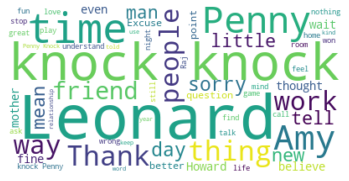

In [76]:
# Generate a word cloud image for sheldon!!
wordcloud = WordCloud(stopwords=stopwords, max_words=60, background_color="white").generate(sheldon)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

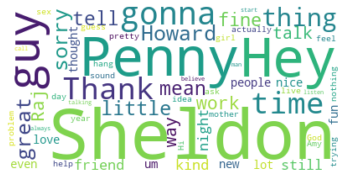

In [77]:
# Generate a word cloud image for leonard!!
wordcloud = WordCloud(stopwords=stopwords, max_words=60, background_color="white").generate(leonard)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

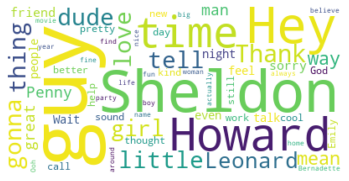

In [78]:
# Generate a word cloud image for raj!!
wordcloud = WordCloud(stopwords=stopwords, max_words=60, background_color="white").generate(raj)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

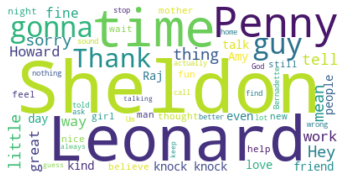

In [79]:
# Generate a word cloud image for the entire show!
wordcloud = WordCloud(stopwords=stopwords, max_words=60, background_color="white").generate(entire_show)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [91]:
for name in main_characters:
    print(name, "has had", data[data["person_scene"]==name].person_scene.count(),"dialogues")

Sheldon has had 11484 dialogues
Leonard has had 9638 dialogues
Raj has had 4576 dialogues
Penny has had 7477 dialogues
Howard has had 5737 dialogues
Amy has had 3419 dialogues
Bernadette has had 2636 dialogues


In [92]:
#how many times a characters name has been said in the show
for name in main_characters:
    print(name,"has been said",entire_show.count(name),"times")

Sheldon has been said 1996 times
Leonard has been said 1501 times
Raj has been said 571 times
Penny has been said 1164 times
Howard has been said 689 times
Amy has been said 661 times
Bernadette has been said 339 times


In [ ]:
for